<a href="https://colab.research.google.com/github/dineshkumarsarangapani/Machine_learning_IITM/blob/main/MLP/case_study/sentiment_analysis/Case_Study_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
url = "https://raw.githubusercontent.com/dineshkumarsarangapani/Machine_learning_IITM/main/MLP/case_study/sentiment_analysis/sentiment_analysis_data.csv"
import pandas as pd

train_data = pd.read_csv(url)

In [172]:
train_data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [173]:
train_data.shape

(5842, 2)

In [174]:
x = train_data['Sentence']  

In [175]:
all_sentences =[]
for i in x :
  all_sentences.append(i)
# len(text)
# all_sentences = ",".join(x)
len(all_sentences)

5842

In [176]:
y = train_data['Sentiment']
y.unique()

array(['positive', 'negative', 'neutral'], dtype=object)

<Axes: >

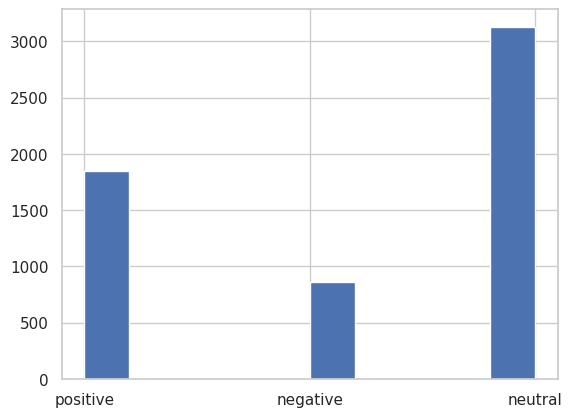

In [177]:
y.hist()

<Axes: xlabel='Sentiment', ylabel='count'>

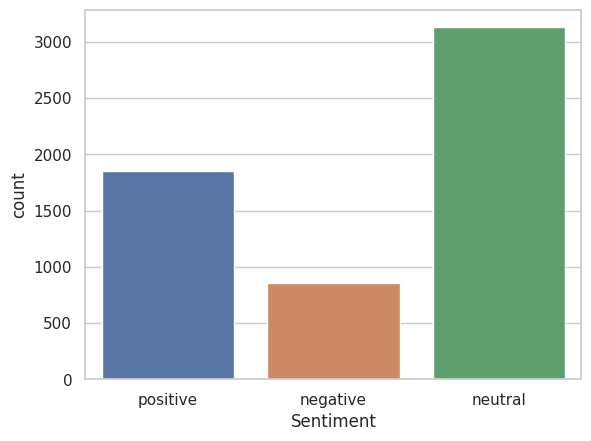

In [178]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.countplot(x=y)

In [179]:
def get_concatinated_sentences(y_class = 'positive'):
  all_class_positions = y==y_class
  # print(all_class_positions)
  all_y_sentence = x[all_class_positions]
  return " ".join(all_y_sentence)

get_concatinated_sentences()

'The GeoSolutions technology will leverage Benefon \'s GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model . For the last quarter of 2010 , Componenta \'s net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m . $SPY wouldn\'t be surprised to see a green close Kone \'s net sales rose by some 14 % year-on-year in the first nine months of 2008 . Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 . The subdivision made sales revenues last year of EUR 480.7 million EUR 414.9 million in 2008 , and operating profits of EUR 44.5 million EUR 7.4 million . $FB gone green on day $MSFT SQL Server revenue grew double-digit with SQL Server Premium revenue growing over 30% http://stks.co/ir2F Aviva, Friends Life top forecasts ahead of 5.6 billion pound merger Shire CEO ste

In [180]:
# WordCloud?

In [181]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text = ""):
  # take relative word frequencies into account, lower max_font_size
  wordcloud = WordCloud(width=1200, height=800,background_color="white",max_words=len(text),max_font_size=200, relative_scaling=.5).generate(text)
  plt.figure()
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

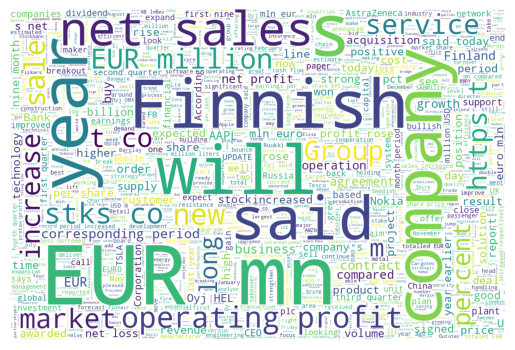

In [182]:
text = get_concatinated_sentences()
plot_wordcloud(text)

In [ ]:
negative_text = get_concatinated_sentences("negative")
plot_wordcloud(negative_text)

In [ ]:
neutral_text = get_concatinated_sentences("neutral")
plot_wordcloud(neutral_text)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
len(stop_words)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(stop_words='english')

In [ ]:
x_cv = cv.fit_transform(all_sentences)
x_cv

In [ ]:
x_cv.shape

In [ ]:
cv.vocabulary_['netflix']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(x_cv.toarray(), y, test_size=0.25, random_state=5)

In [ ]:
len(y_test[y_test=='positive'])

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
bayes=MultinomialNB()
bayes.fit(X_train, y_train)

In [ ]:
bayes.score(X_train, y_train)

In [ ]:
bayes.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix

y_pred = bayes.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
# ConfusionMatrixDisplay?
cm = confusion_matrix(y_test, y_pred)

In [ ]:
disp = ConfusionMatrixDisplay(cm, display_labels=bayes.classes_)
disp.plot()

In [ ]:
pred_sen = 'The compnay XYZ did not perform well in the first quarter. Its sales have been declining'

x_tes = cv.transform([pred_sen])
bayes.predict(x_tes.toarray())

In [ ]:
pred_sen = 'The growth rate of the company has been positive. Its shares price is also increasing. '

x_tes = cv.transform([pred_sen])
bayes.predict(x_tes.toarray())